In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
df=pd.read_csv('test.csv')

In [66]:
df.shape

(3500, 8)

In [67]:
df.head()

,Product_ID,Product_Name,Category,Region,Price,Quantity,Discount,Sales
0,1651,Alpha_0032,Electronics,North,179.41,5.0,0.218,709.14
1,2457,Gamma_2457,Home,East,389.76,10.0,0.017,3822.49
2,2233,Beta_2233,Grocery,South,388.89,10.0,0.280,2788.73
3,1946,Omicron_1946,Electronics,East,120.33,8.0,0.168,802.64
4,310,Zeta_0310,Stationery,East,281.19,6.0,0.096,1529.92


In [68]:
df.describe()

,Product_ID,Price,Quantity,Discount,Sales
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1750.500000,312.410887,8.042000,0.149202,2096.671604
std,1010.507298,175.489652,2.804623,0.087065,1359.296738
min,1.000000,-147.715000,1.000000,0.000000,-1468.077500
25%,875.750000,182.947500,6.000000,0.072000,1082.142500
50%,1750.500000,271.460000,8.000000,0.149000,1735.330000
75%,2625.250000,403.312500,10.000000,0.226000,2782.090000
max,3500.000000,734.045000,16.000000,0.300000,5332.222500


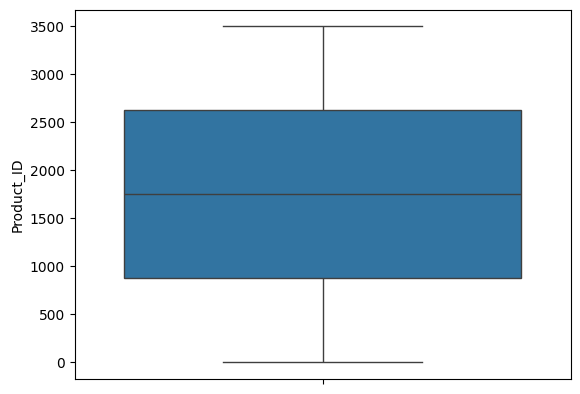

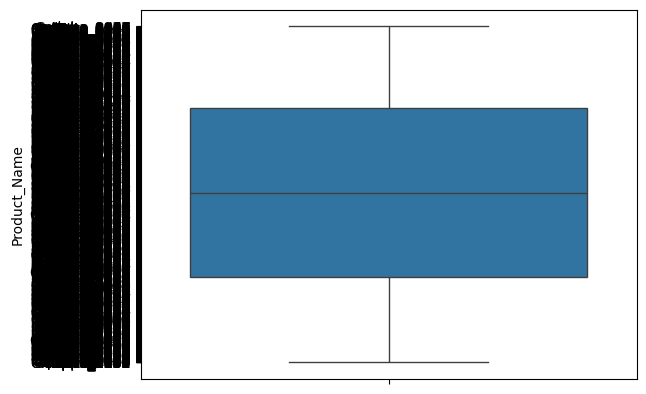

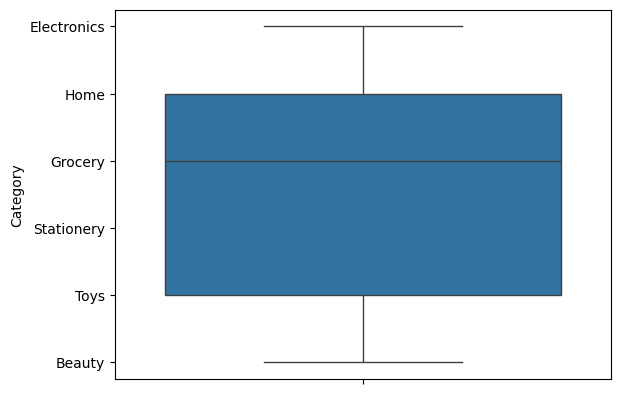

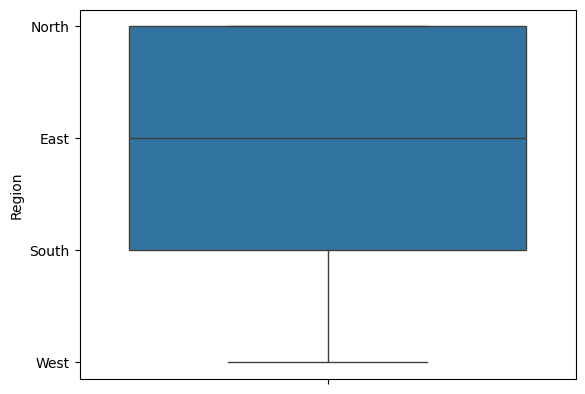

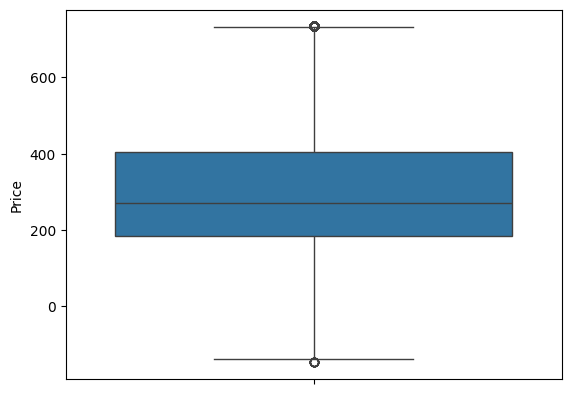

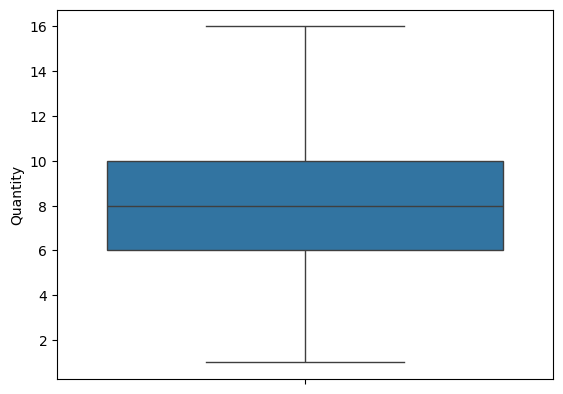

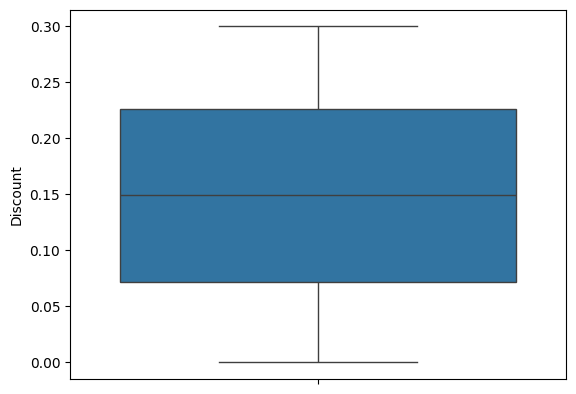

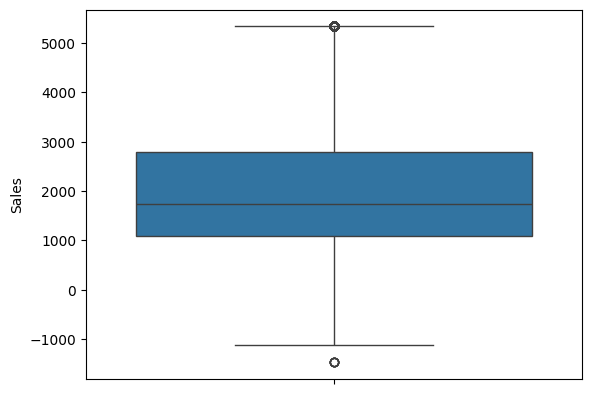

In [69]:
for col in df:
    sns.boxplot(df[col])
    plt.show()

In [70]:
df.drop('Product_ID',inplace=True,axis=1)

In [71]:
categorical_cols=df.select_dtypes('object').columns
categorical_cols

Index(['Product_Name', 'Category', 'Region'], dtype='object')

In [72]:
df['Product_Name'].nunique()

3465

In [73]:
#target encoding
from category_encoders.target_encoder import TargetEncoder

In [74]:
te=TargetEncoder(cols=['Product_Name'])
df['Product name TE']=te.fit_transform(df['Product_Name'],df['Sales'])
print(df[['Product_Name','Product name TE']])

      Product_Name  Product name TE
0       Alpha_0032      2222.631324
1       Gamma_2457      2321.215202
2        Beta_2233      2186.714266
3     Omicron_1946      1928.307126
4        Zeta_0310      2022.932417
...            ...              ...
3495     Beta_1096      1928.128877
3496     Beta_1131      1911.183550
3497    Delta_1295      2099.110929
3498    Delta_0861      2297.297361
3499    Gamma_3175      2049.657999

[3500 rows x 2 columns]


In [75]:
df.drop('Product_Name',axis=1,inplace=True)

In [76]:
df['Category'].nunique()

6

In [77]:
df['Category'].unique()

array(['Electronics', 'Home', 'Grocery', 'Stationery', 'Toys', 'Beauty'],
      dtype=object)

In [78]:
from category_encoders import CountEncoder

In [79]:
ce=CountEncoder(cols=['Category'])
df['Category ce']=ce.fit_transform(df['Category'])
print(df[['Category','Category ce']])

         Category  Category ce
0     Electronics          622
1            Home          643
2         Grocery          821
3     Electronics          622
4      Stationery          536
...           ...          ...
3495      Grocery          821
3496      Grocery          821
3497         Home          643
3498       Beauty          488
3499  Electronics          622

[3500 rows x 2 columns]


In [80]:
df.drop('Category',axis=1,inplace=True)

In [81]:
df['Region'].nunique()

4

In [82]:
from sklearn.preprocessing import OneHotEncoder

In [83]:
ohe=OneHotEncoder(drop='if_binary',sparse_output=False)

In [84]:
encoded=ohe.fit_transform(df[['Region']])
df1=pd.DataFrame(encoded,columns=ohe.get_feature_names_out(['Region']),index=df.index)
print(df1)

      Region_East  Region_North  Region_South  Region_West
0             0.0           1.0           0.0          0.0
1             1.0           0.0           0.0          0.0
2             0.0           0.0           1.0          0.0
3             1.0           0.0           0.0          0.0
4             1.0           0.0           0.0          0.0
...           ...           ...           ...          ...
3495          0.0           1.0           0.0          0.0
3496          1.0           0.0           0.0          0.0
3497          0.0           1.0           0.0          0.0
3498          0.0           0.0           0.0          1.0
3499          0.0           1.0           0.0          0.0

[3500 rows x 4 columns]


In [85]:
df=pd.concat([df,df1],axis=1)
df

,Region,Price,Quantity,Discount,Sales,Product name TE,Category ce,Region_East,Region_North,Region_South,Region_West
0,North,179.41,5.0,0.218,709.14,2222.631324,622,0.0,1.0,0.0,0.0
1,East,389.76,10.0,0.017,3822.49,2321.215202,643,1.0,0.0,0.0,0.0
2,South,388.89,10.0,0.280,2788.73,2186.714266,821,0.0,0.0,1.0,0.0
3,East,120.33,8.0,0.168,802.64,1928.307126,622,1.0,0.0,0.0,0.0
4,East,281.19,6.0,0.096,1529.92,2022.932417,536,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3495,North,218.93,4.0,0.084,801.27,1928.128877,821,0.0,1.0,0.0,0.0
3496,East,271.46,8.0,0.066,671.03,1911.183550,821,1.0,0.0,0.0,0.0
3497,North,377.83,6.0,0.071,2115.42,2099.110929,643,0.0,1.0,0.0,0.0
3498,West,439.67,9.0,0.081,3638.66,2297.297361,488,0.0,0.0,0.0,1.0


In [86]:
df.drop('Region',axis=1,inplace=True)

In [87]:
df.head()

,Price,Quantity,Discount,Sales,Product name TE,Category ce,Region_East,Region_North,Region_South,Region_West
0,179.41,5.0,0.218,709.14,2222.631324,622,0.0,1.0,0.0,0.0
1,389.76,10.0,0.017,3822.49,2321.215202,643,1.0,0.0,0.0,0.0
2,388.89,10.0,0.280,2788.73,2186.714266,821,0.0,0.0,1.0,0.0
3,120.33,8.0,0.168,802.64,1928.307126,622,1.0,0.0,0.0,0.0
4,281.19,6.0,0.096,1529.92,2022.932417,536,1.0,0.0,0.0,0.0


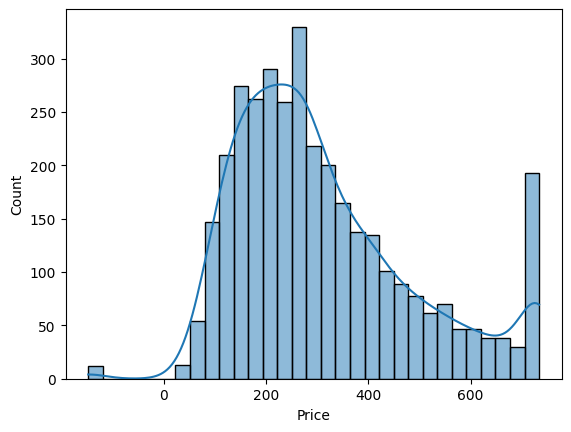

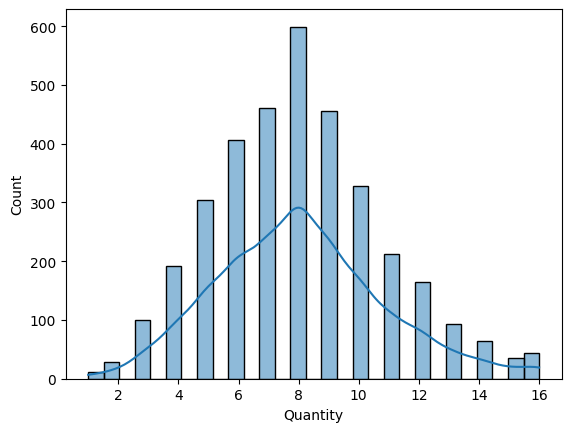

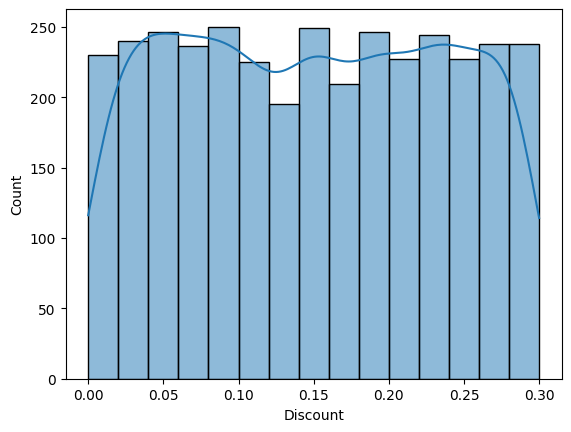

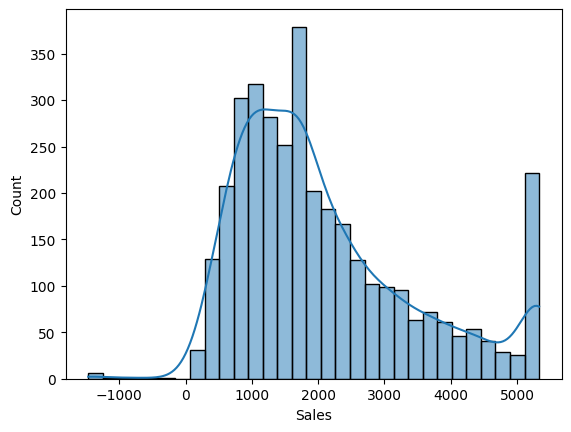

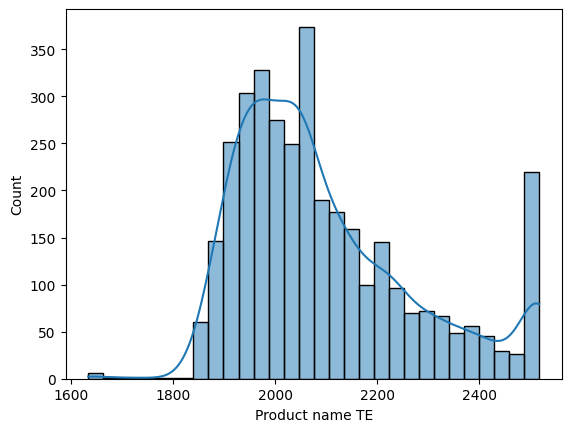

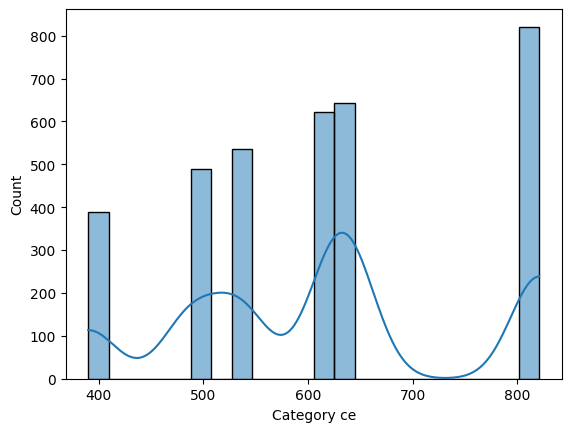

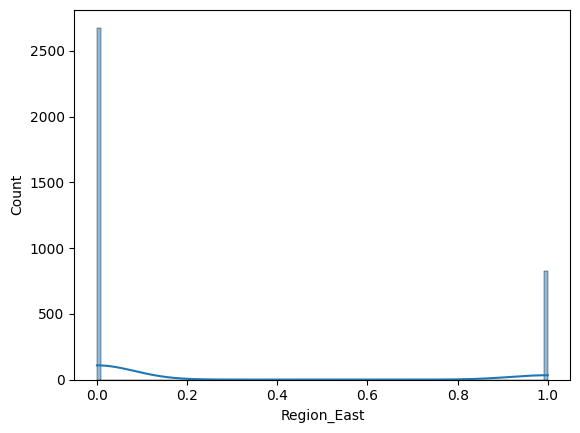

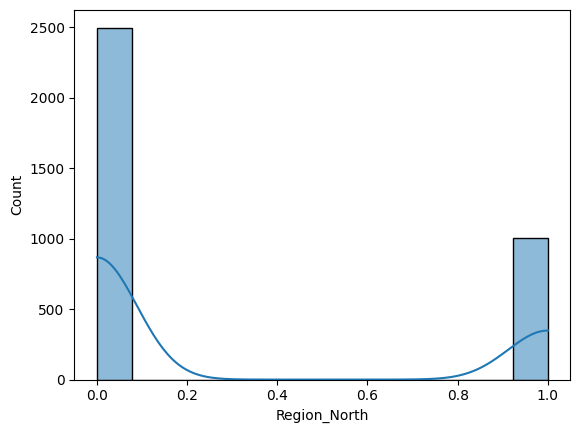

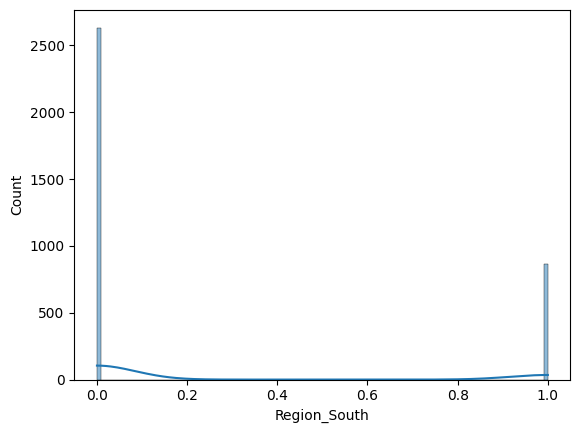

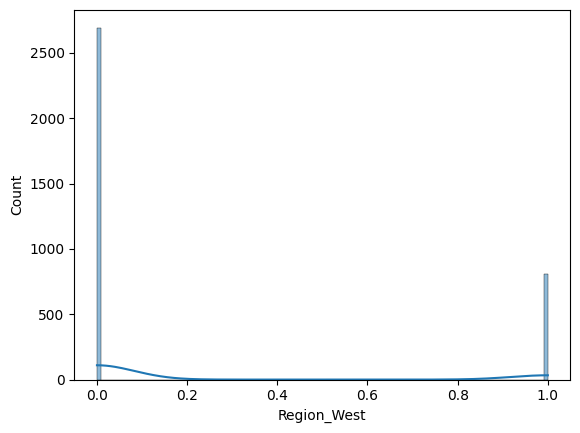

In [91]:
for col in df:   
    sns.histplot(df[col],kde=True)
    plt.show()

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler=StandardScaler()

In [95]:
df['Quantity']=scaler.fit_transform(df[['Quantity']])

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
df.columns

Index(['Price', 'Quantity', 'Discount', 'Sales', 'Product name TE',
       'Category ce', 'Region_East', 'Region_North', 'Region_South',
       'Region_West'],
      dtype='object')

In [ ]:
col=['Price','Discount','Category ce','Product name TE']
df[col]=scaler.fit_transform(df[col])

In [102]:
from sklearn.preprocessing import RobustScaler

In [104]:
scaler=RobustScaler()
df['Sales']=scaler.fit_transform(df[['Sales']])

In [105]:
df.head()

,Price,Quantity,Discount,Sales,Product name TE,Category ce,Region_East,Region_North,Region_South,Region_West
0,-0.757993,-1.084793,0.790305,-0.603660,0.708045,0.052063,0.0,1.0,0.0,0.0
1,0.440825,0.698233,-1.518657,1.227779,1.267055,0.204603,1.0,0.0,0.0,0.0
2,0.435866,0.698233,1.502522,0.619666,0.504381,1.497562,0.0,0.0,1.0,0.0
3,-1.094699,-0.014977,0.215936,-0.548658,-0.960892,0.052063,1.0,0.0,0.0,0.0
4,-0.177933,-0.728188,-0.611155,-0.120833,-0.424329,-0.572625,1.0,0.0,0.0,0.0
